<a href="https://colab.research.google.com/github/NicoGa1/CAS_ADS/blob/main/CAS_CH_Rents_Fred%26Nico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Module 2 - Differences in rental costs in Switzerland**

This is our project for Module 2.

Plots, numbers and tables for the presentation are produced with this Notebook.

*Enjoy going through it,*

*Fred & Nico*

# 1. Introduction

When following the capitalistic assumption that rent prices should follow a simple SUPPLY and DEMAND logic, we expect the prices per square meter (SQM) to be directly correlated with the availibility of empty real estate in each of the cantons (SUPPLY) as well as the amount of people looking for appartments (DEMAND).

We collected information from different sources to mimic these supply and demand effects and to check wether classic market theory holds an explanation for the tremendous differences in Swiss rental costs. 

The proxy variables we used for supply is the "Leerstand", meaning the percentage of available empty appartements per canton.

The proxy variable we used for demand is the amount of people living in one appartment represented by the density per room. 

Our hypothesis is that a correlation between the rent price and these two variables exists, explaining the rent price difference between the 26 cantons.

**Data analysis**

- Data collection

We extracted different datasets from bfs.admin.ch and combined the date for the different datasets and for the different timeframes into a single dataframe (see CSV below). For this we used information from the following sources:

   - Average rental costs per square meter split by rooms (per appartement) and split by canton from 2012 to 2020 - https://www.bfs.admin.ch/bfs/de/home/statistiken/bau-wohnungswesen/wohnungen/mietwohnungen.html#:~:text=Durchschnittlicher%20Mietpreis%20pro%20m2%20in%20Franken%20nach%20Zimmerzahl%20und%20Kanton
   - Empty quota of appartements ("Leerstand" in German) per canton from 2012 to 2020 - https://www.bfs.admin.ch/bfs/de/home/statistiken/bau-wohnungswesen/wohnungen/leerwohnungen.html#:~:text=Leer%20stehende%20Wohnungen%20nach%20Kantonen
   - Density of the people living in a appartement per room as well as per appartement - https://www.bfs.admin.ch/bfs/de/home/statistiken/bau-wohnungswesen/wohnungen/wohnverhaeltnisse.html#:~:text=Wohndichte%20nach%20der%20Anzahl%20und%20Nationalit%C3%A4t%20der%20Haushaltsmitglieder%2C%20nach%20Kanton

The initial parsing of information has been done outside from a Python environment as the original data came in more than 30 different EXCEL tabs with different header texts and positions which would have cost a lot of effort to build an automated import with Python.

- Description of the data

Our dataframe includes the following variables of rental prices:
   - **"Region"** distinguishes the different cantons and gives an aggregated view on the whole of Switzerland
   - **"Year"** defines the timeframe of collected information from 2012 to 2020
   - **"Total"** represents the weighted average rental cost per square meter (SQM) for a specific time in a specific region
   - **"Room_rent_SQM"** divides the "Total" value into different subsets of rents per type of appartements, distinguishing appartements with 1, 2, 3, 4, 5 or 6 (and more) rooms
   - **"Empty_quota"** provides the percentage of empty appartements in a specific region and year ("Leerstandsquote" in German)
   - **"Density_p_per_"** represents the amount of people living in a room or a appartement and therefore represents the density/usage rate of living space
   - **"Size_per_p_in_sqm"** shows how much space a person uses for living in a specific region and year
   - **"Ownership_quota"** tells us the percentage of owned appartements compared to rented appartements. The higher the value, the more appartements are owned
   - **"Amount_total"** provides additional information on the amount of appartements in Switzerland. This variable is split by sub-categories like regular rentals (Amount_rentals), rented via cooperative (Amount_Genossenschaft) and owned property (distinguished between Amount_own_appartement and Amount_own_house)

**Definition of significant**

We consider p-values below 0.05 as unlikely enough to reject the price effect hypothesis.

**Additional information on our datasets**

Our analysis will be focusing on the following three extracted datasets:
  - Dataset of the rents prices in Switzerland (in CHF)
  - Dataset of the population density in Switzerland
  - Dataset of the empty appartements in Switzerland

All null values in the initial dataset were represented by "X" and have been replaced with 0 to use the data directly as floats.

How this potentially affected our outcome is described in a later section.

**a. Import the modules we will need:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from scipy import stats
from traitlets.traitlets import describe
import statsmodels.api as sm
from pandas.io.formats.style_render import DataFrame

**b. Create the dataset**

In [ ]:
url = 'https://raw.githubusercontent.com/fbaertl/Test-module-M---CAS-2022/main/Rooms_clean2.csv'
ALLIN = pd.read_csv(url)

As described above, certain steps have been done outside of a Python environment to "prepare" the data for analysis.

# 2. Description of the dataset

First we change the type of the variable "Density_p_per_room" to float.
This is due to the fact that one value in the density csv file is being read as text, thus all the values are read as text.

In [ ]:
ALLIN["Density_p_per_room"] = ALLIN["Density_p_per_room"].astype(float)

Then we create different dataframes.

We split our overall dataset into different dataframes distinguished by two variables: a) "YEAR" and b) "CANTONS".

In [ ]:
#Dataframes per YEARS 
ALL2020 = ALLIN[ALLIN['Year'] == 2020]
ALL2019 = ALLIN[ALLIN['Year'] == 2019]
ALL2018 = ALLIN[ALLIN['Year'] == 2018]
ALL2017 = ALLIN[ALLIN['Year'] == 2017]
ALL2016 = ALLIN[ALLIN['Year'] == 2016]
ALL2015 = ALLIN[ALLIN['Year'] == 2015]
ALL2014 = ALLIN[ALLIN['Year'] == 2014]
ALL2013 = ALLIN[ALLIN['Year'] == 2013]
ALL2012 = ALLIN[ALLIN['Year'] == 2012]

#Dataframes per CANTONS
CANTONS2012 = ALL2012[ALL2012['Region'] != 'Schweiz']
CANTONS2013 = ALL2013[ALL2013['Region'] != 'Schweiz']
CANTONS2014 = ALL2014[ALL2014['Region'] != 'Schweiz']
CANTONS2015 = ALL2015[ALL2015['Region'] != 'Schweiz']
CANTONS2016 = ALL2016[ALL2016['Region'] != 'Schweiz']
CANTONS2017 = ALL2017[ALL2017['Region'] != 'Schweiz']
CANTONS2018 = ALL2018[ALL2018['Region'] != 'Schweiz']
CANTONS2019 = ALL2019[ALL2019['Region'] != 'Schweiz']
CANTONS2020 = ALL2020[ALL2020['Region'] != 'Schweiz']

#Dataframes per CANTONS and sorted per rent price per SQM
CANTONS2012SORTED = CANTONS2012.sort_values(by='Total', ascending=False)
CANTONS2013SORTED = CANTONS2013.sort_values(by='Total', ascending=False)
CANTONS2014SORTED = CANTONS2014.sort_values(by='Total', ascending=False)
CANTONS2015SORTED = CANTONS2015.sort_values(by='Total', ascending=False)
CANTONS2016SORTED = CANTONS2016.sort_values(by='Total', ascending=False)
CANTONS2017SORTED = CANTONS2017.sort_values(by='Total', ascending=False)
CANTONS2018SORTED = CANTONS2018.sort_values(by='Total', ascending=False)
CANTONS2019SORTED = CANTONS2019.sort_values(by='Total', ascending=False)
CANTONS2020SORTED = CANTONS2020.sort_values(by='Total', ascending=False)

#Dataframe for all Switzerland
ALLCH = ALLIN[ALLIN['Region'] == 'Schweiz']

#Dataframe for the describe function
ALLDESCRIBE = ALLIN[['Region','Total']]

In [ ]:
#Overview of the different arrays in the dataframe ALLCH
ALLCH.head(9)

,Region,Year,Total,1Room_rent_SQM,2Room_rent_SQM,3Room_rent_SQM,4Room_rent_SQM,5Room_rent_SQM,6Room_rent_SQM,Empty_quota,Density_p_per_room,density_p_per_flat,Size_per_p_in_sqm,Ownership_quota,Amount_total,amount_Rentals,amount_Genossenschaft,amount_own_flat,amount_own_house,amount_Others
0,Schweiz,2020,16.5,20.4,18.2,16.6,15.6,15.6,16.5,1.54,0.59,2.2,46.3,36.2,3860675,2232548,109858,456787,941043,120438
27,Schweiz,2019,16.4,19.3,18.0,16.5,15.6,15.4,16.1,1.72,0.59,2.2,46.0,36.4,3804777,2183189,111881,446373,937868,125466
54,Schweiz,2018,16.2,19.2,17.7,16.3,15.5,15.3,16.3,1.66,0.60,2.2,45.7,36.6,3755689,2152134,107655,436818,938296,120786
81,Schweiz,2017,15.9,18.2,17.2,16.0,15.2,15.3,16.0,1.62,0.60,2.2,45.5,38.0,3715931,2097818,107119,445559,967793,97643
108,Schweiz,2016,15.8,18.1,17.2,15.9,15.1,15.1,16.1,1.45,0.60,2.2,45.4,38.2,3675121,2066409,104777,442042,963222,98671
135,Schweiz,2015,15.6,17.6,16.8,15.7,15.1,15.0,16.3,1.30,0.60,2.3,45.2,38.4,3623266,2036758,100067,431419,959162,95861
162,Schweiz,2014,16.2,18.0,17.2,16.3,15.7,15.6,16.6,1.18,0.60,2.3,45.1,37.4,3576648,2001550,102555,408683,930228,133632
189,Schweiz,2013,16.0,17.6,17.2,16.1,15.5,15.5,16.7,1.07,0.60,2.3,45.0,37.5,3532648,1971784,99101,404876,920831,136056
216,Schweiz,2012,15.9,18.3,17.3,16.0,15.4,15.1,15.9,0.97,0.60,2.3,45.0,37.2,3553711,1980070,97577,391821,910123,119876


In [ ]:
#Overview on the main characteristics of our data. 
ALLDESCRIBE.describe() 

,Total
count,243.000000
mean,14.908642
std,2.119481
min,10.700000
25%,13.300000
50%,14.500000
75%,16.450000
max,19.800000


**a. Plot the histograms**

Let us first see which are the Top 5 cantons in 2020 before plotting the histogram for that year.

In [ ]:
CANTONS2020SORTED.head(5)

,Region,Year,Total,1Room_rent_SQM,2Room_rent_SQM,3Room_rent_SQM,4Room_rent_SQM,5Room_rent_SQM,6Room_rent_SQM,Empty_quota,Density_p_per_room,density_p_per_flat,Size_per_p_in_sqm,Ownership_quota,Amount_total,amount_Rentals,amount_Genossenschaft,amount_own_flat,amount_own_house,amount_Others
25,Genf,2020,19.7,21.8,21.0,19.7,18.7,19.0,21.3,0.51,0.75,2.4,36.9,18.0,199994,148838,8119,17834,18246,6957
9,Zug,2020,19.4,20.4,22.3,19.3,18.7,19.4,18.3,0.34,0.60,2.3,47.6,32.1,55599,35474,1054,10329,7519,1223
1,Zurich,2020,19.3,25.5,21.6,19.2,18.0,17.8,19.8,0.72,0.61,2.2,44.9,27.4,701225,447314,49588,78490,113779,12054
12,Basel_Stadt,2020,18.2,21.4,19.3,17.7,17.6,18.1,18.7,1.10,0.63,2.0,41.5,15.4,97524,72378,9142,5857,9184,964
22,Waadt,2020,18.0,23.7,19.7,17.7,16.9,16.5,18.3,1.35,0.63,2.2,43.3,29.9,360277,235177,4398,41630,65999,13073


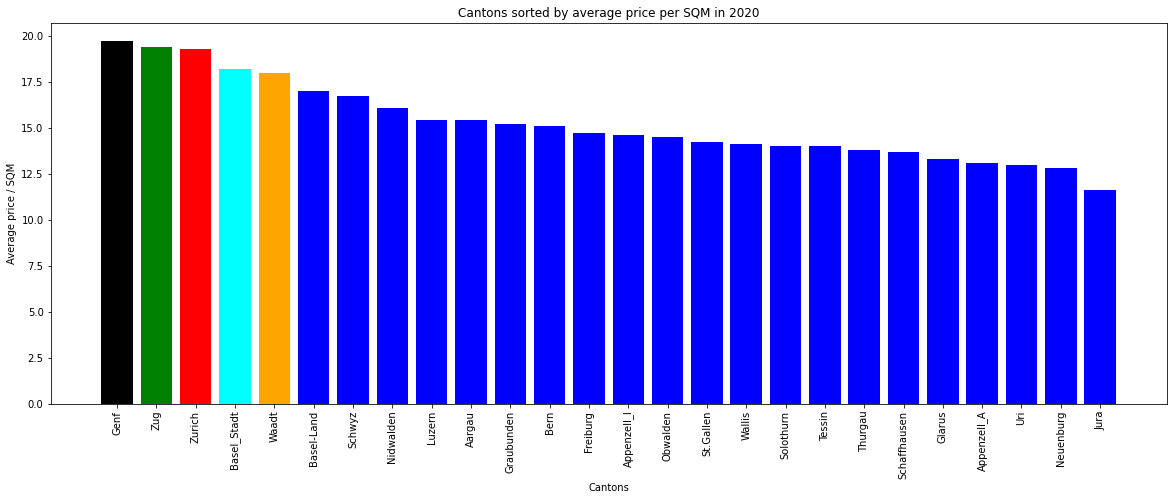

In [ ]:
plt.figure(figsize = (20,7))
plt.bar(CANTONS2020SORTED['Region'], CANTONS2020SORTED['Total'], color=['black', 'green', 'red', 'cyan','orange','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xticks(rotation = 90)
plt.xlabel ('Cantons')
plt.ylabel ('Average price / SQM')
plt.title('Cantons sorted by average price per SQM in 2020')
plt.show()

Let us now take a look at the development of the prices over the last 10 years to understand if the top 5 cantons changed over time.

<Figure size 432x288 with 0 Axes>

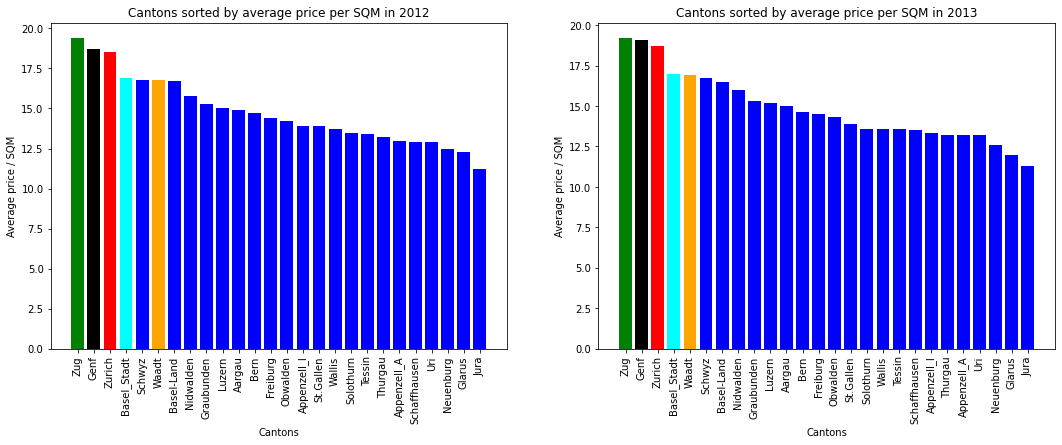

<Figure size 432x288 with 0 Axes>

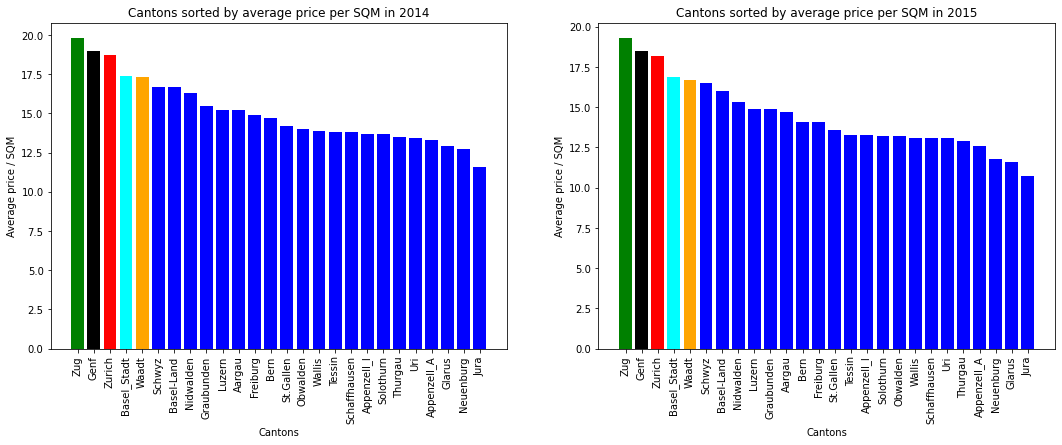

<Figure size 432x288 with 0 Axes>

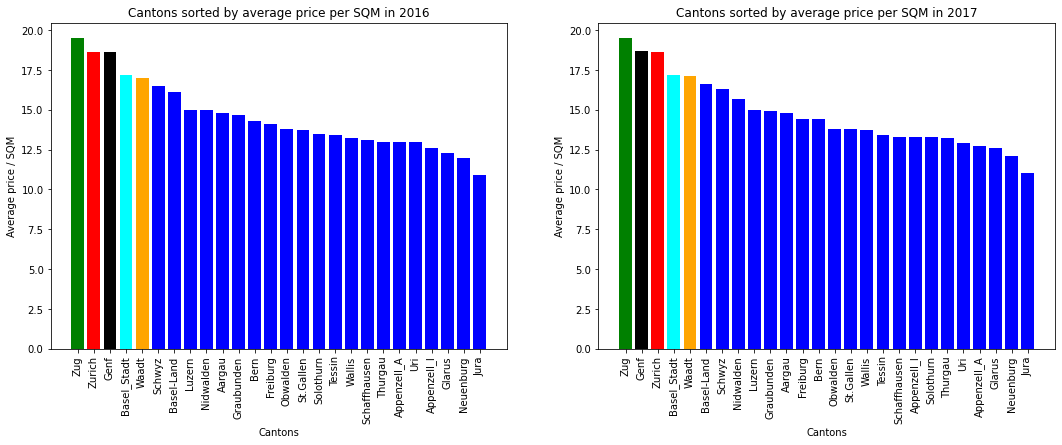

<Figure size 432x288 with 0 Axes>

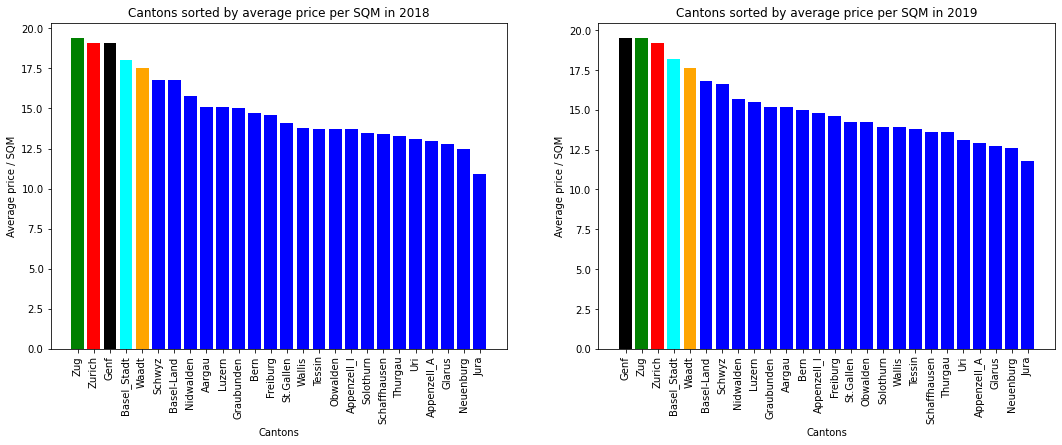

In [ ]:
#First two plots are for 2012 and 2013
plt.figure(1)
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
plt.bar(CANTONS2012SORTED['Region'],CANTONS2012SORTED['Total'], color=['green','black','red','cyan','blue', 'orange', 'blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.xlabel ('Cantons')
plt.ylabel ('Average price / SQM')
plt.title('Cantons sorted by average price per SQM in 2012')

plt.subplot(1, 2, 2)
plt.bar(CANTONS2013SORTED['Region'],CANTONS2013SORTED['Total'], color=['green','black','red','cyan','orange','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.xlabel ('Cantons')
plt.ylabel ('Average price / SQM')
plt.title('Cantons sorted by average price per SQM in 2013')
plt.show()

#Second two plots are for 2014 and 2015
plt.figure(2)
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
plt.bar(CANTONS2014SORTED['Region'], CANTONS2014SORTED['Total'], color=['green','black','red','cyan', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.xticks(rotation = 90)
plt.xlabel('Cantons')
plt.ylabel('Average price / SQM')
plt.title('Cantons sorted by average price per SQM in 2014')

plt.subplot(1, 2, 2)
plt.bar(CANTONS2015SORTED['Region'],CANTONS2015SORTED['Total'], color=['green','black','red','cyan','orange','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.xlabel ('Cantons')
plt.ylabel ('Average price / SQM')
plt.title('Cantons sorted by average price per SQM in 2015')
plt.show()

#Third two plots are for 2016 and 2017
plt.figure(3)
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
plt.bar(CANTONS2016SORTED['Region'], CANTONS2016SORTED['Total'], color=['green', 'red', 'black', 'cyan', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.xticks(rotation = 90)
plt.xlabel('Cantons')
plt.ylabel('Average price / SQM')
plt.title('Cantons sorted by average price per SQM in 2016')

plt.subplot(1, 2, 2)
plt.bar(CANTONS2017SORTED['Region'],CANTONS2017SORTED['Total'], color=['green','black','red','cyan','orange','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xticks(rotation=90)
plt.xlabel ('Cantons')
plt.ylabel ('Average price / SQM')
plt.title('Cantons sorted by average price per SQM in 2017')
plt.show()

#Last two plots are for 2018 and 2019
plt.figure(4)
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
plt.bar(CANTONS2018SORTED['Region'], CANTONS2018SORTED['Total'], color=['green', 'red', 'black', 'cyan', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.xticks(rotation = 90)
plt.xlabel('Cantons')
plt.ylabel('Average price / SQM')
plt.title('Cantons sorted by average price per SQM in 2018')

plt.subplot(1, 2, 2)
plt.bar(CANTONS2019SORTED['Region'], CANTONS2019SORTED['Total'], color=['black', 'green', 'red', 'cyan', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.xticks(rotation = 90)
plt.xlabel('Cantons')
plt.ylabel('Average price / SQM')
plt.title('Cantons sorted by average price per SQM in 2019')
plt.show()

We can see that the top 5 are still the same and that the last 10 years did not show any substantial changes in the the order of the cantons.

Only Waadt has been on the 6th position for one year in 2012.

Thus we create dataframes for those Top 5 cantons to use later.

In [ ]:
#Dataframes for the Top 5 cantons
ALLZH = ALLIN[(ALLIN['Region'] == 'Zurich')]
ALLZG = ALLIN[(ALLIN['Region'] == 'Zug')]
ALLBS = ALLIN[(ALLIN['Region'] == 'Basel_Stadt')]
ALLVD = ALLIN[(ALLIN['Region'] == 'Waadt')]
ALLGE = ALLIN[(ALLIN['Region'] == 'Genf')]

**b. Plot the scatter**

Let us now take a look at the development of prices over the last 10 years for our Top 5 Cantons to see if there is a common trend.

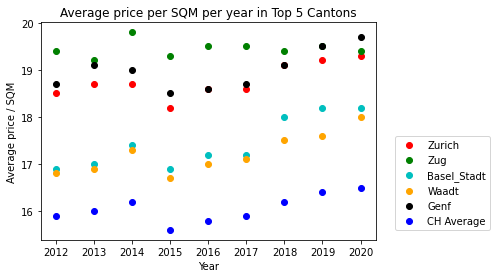

In [ ]:
#Plotting a scatter for our Top 5 cantons
plt.scatter(ALLZH['Year'], ALLZH['Total'], c='r', label='Zurich')
plt.scatter(ALLZG['Year'], ALLZG['Total'], c='g', label='Zug')
plt.scatter(ALLBS['Year'], ALLBS['Total'], c='c', label='Basel_Stadt')
plt.scatter(ALLVD['Year'], ALLVD['Total'], c='orange', label='Waadt')
plt.scatter(ALLGE['Year'], ALLGE['Total'], c='black', label='Genf')
plt.scatter(ALLCH['Year'], ALLCH['Total'], c='b', label='CH Average')
plt.xlabel ('Year')
plt.ylabel ('Average price / SQM')
plt.title('Average price per SQM per year in Top 5 Cantons')
plt.legend(loc = 9,  bbox_to_anchor=(1.2,0.5))
plt.show()

We can see that there is a slight increase for Waadt, Basel, Zurich and Geneva while Zug looks more like a stagnation with a slight decrease over time.

While the average price per SQM is lower, we see a similar trend with an increase from 2012 to 2014 followed by a short decline and a second steady increase from 2015 to 2020 for all Switzerland.

**c. Comparison depending on the amount of rooms per appartements**

Until now we used the "total" rental price ignoring appartment characteristics, but using average prices per square meter might be misleading considering the difference of basic 1 room appartments and luxury 6+ room appartments. 

We will now take a look at the prices distinguished by the amount of rooms and focus on our top 5 population. Therefore, let us compare the average price per SQM of 1 room appartement in the top 5 cantons (Basel-Stadt, Geneva, Waadt, Zug und Zurich) with the average price per SQM in Switzerland:

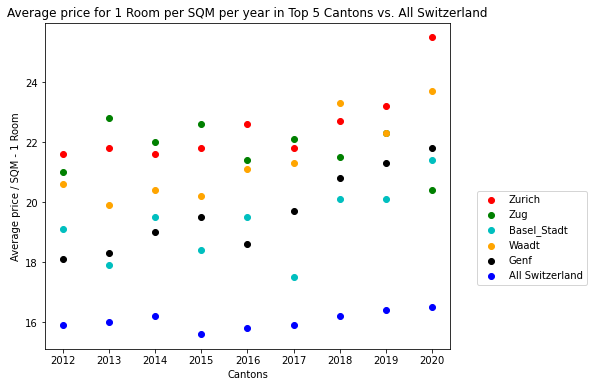

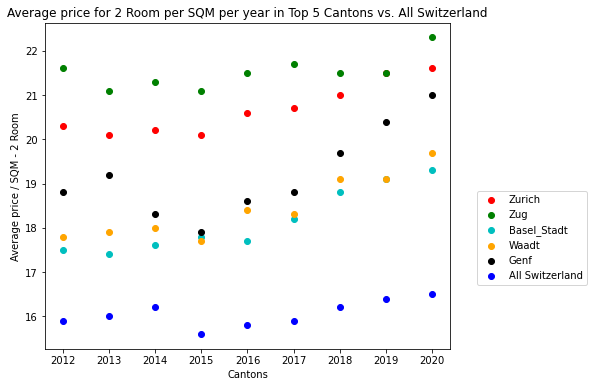

In [ ]:
#Plotting of the 1 room appartements
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.scatter(ALLZH['Year'],ALLZH['1Room_rent_SQM'],c='r',label='Zurich')
plt.scatter(ALLZG['Year'],ALLZG['1Room_rent_SQM'],c='g',label='Zug')
plt.scatter(ALLBS['Year'],ALLBS['1Room_rent_SQM'],c='c',label='Basel_Stadt')
plt.scatter(ALLVD['Year'],ALLVD['1Room_rent_SQM'],c='orange',label='Waadt')
plt.scatter(ALLGE['Year'],ALLGE['1Room_rent_SQM'],c='black',label='Genf')
plt.scatter(ALLCH['Year'],ALLCH['Total'],c='b',label='All Switzerland')
plt.xlabel ('Cantons')
plt.ylabel ('Average price / SQM - 1 Room')
plt.title('Average price for 1 Room per SQM per year in Top 5 Cantons vs. All Switzerland')
plt.legend(loc=9, bbox_to_anchor=(1.2,0.5))
plt.show()

#Plotting of the 2 room appartements
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 2)
plt.scatter(ALLZH['Year'],ALLZH['2Room_rent_SQM'],c='r',label='Zurich')
plt.scatter(ALLZG['Year'],ALLZG['2Room_rent_SQM'],c='g',label='Zug')
plt.scatter(ALLBS['Year'],ALLBS['2Room_rent_SQM'],c='c',label='Basel_Stadt')
plt.scatter(ALLVD['Year'],ALLVD['2Room_rent_SQM'],c='orange',label='Waadt')
plt.scatter(ALLGE['Year'],ALLGE['2Room_rent_SQM'],c='black',label='Genf')
plt.scatter(ALLCH['Year'],ALLCH['Total'],c='b',label='All Switzerland')
plt.xlabel ('Cantons')
plt.ylabel ('Average price / SQM - 2 Room')
plt.title('Average price for 2 Room per SQM per year in Top 5 Cantons vs. All Switzerland')
plt.legend(loc=9, bbox_to_anchor=(1.2,0.5))
plt.show()

Against the initial prediction, the price increase in "smaller" appartements (1 Room) is actually very strong indicating that smaller appartments are more strongly affected by price changes that the "average".

The price increase for 2 Room appartments is also very strong for the Top5 Cantons. Considering the fact that 1 or 2 Room appartments are normally for Singles in a specific age category, the explanation might be a change in the "lifestyle" of our society. 


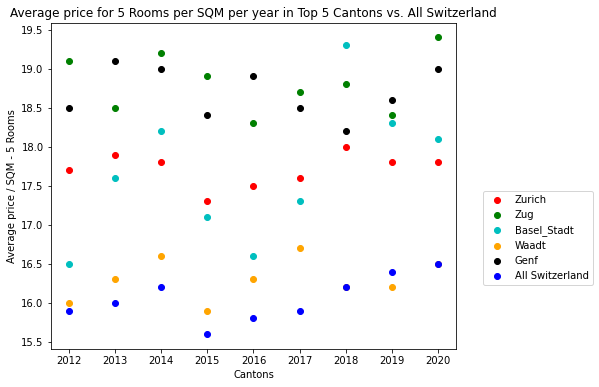

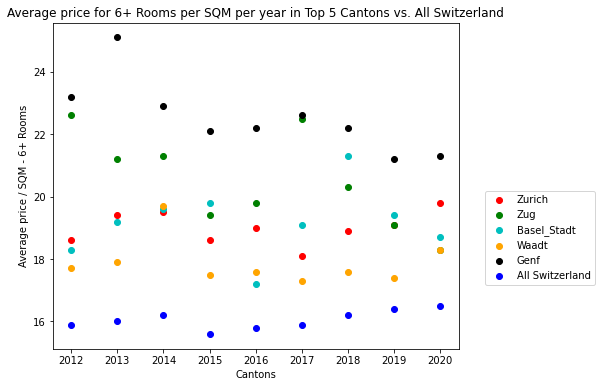

In [ ]:
#Plotting of the 5 room
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.scatter(ALLZH['Year'],ALLZH['5Room_rent_SQM'],c='r',label='Zurich')
plt.scatter(ALLZG['Year'],ALLZG['5Room_rent_SQM'],c='g',label='Zug')
plt.scatter(ALLBS['Year'],ALLBS['5Room_rent_SQM'],c='c',label='Basel_Stadt')
plt.scatter(ALLVD['Year'],ALLVD['5Room_rent_SQM'],c='orange',label='Waadt')
plt.scatter(ALLGE['Year'],ALLGE['5Room_rent_SQM'],c='black',label='Genf')
plt.scatter(ALLCH['Year'],ALLCH['Total'],c='b',label='All Switzerland')
plt.xlabel ('Cantons')
plt.ylabel ('Average price / SQM - 5 Rooms')
plt.title('Average price for 5 Rooms per SQM per year in Top 5 Cantons vs. All Switzerland')
plt.legend(loc=9, bbox_to_anchor=(1.2,0.5))
plt.show()

#Plotting of the 6+ room
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 2)
plt.scatter(ALLZH['Year'],ALLZH['6Room_rent_SQM'],c='r',label='Zurich')
plt.scatter(ALLZG['Year'],ALLZG['6Room_rent_SQM'],c='g',label='Zug')
plt.scatter(ALLBS['Year'],ALLBS['6Room_rent_SQM'],c='c',label='Basel_Stadt')
plt.scatter(ALLVD['Year'],ALLVD['6Room_rent_SQM'],c='orange',label='Waadt')
plt.scatter(ALLGE['Year'],ALLGE['6Room_rent_SQM'],c='black',label='Genf')
plt.scatter(ALLCH['Year'],ALLCH['Total'],c='b',label='All Switzerland')
plt.xlabel ('Cantons')
plt.ylabel ('Average price / SQM - 6+ Rooms')
plt.title('Average price for 6+ Rooms per SQM per year in Top 5 Cantons vs. All Switzerland')
plt.legend(loc=9, bbox_to_anchor=(1.2,0.5))
plt.show()

We can see that the trend for 5 Room appartements is less strong but still increasing. 

By comparison, we see that the trend for "luxury" appartements (6+ rooms) is much weaker with slight increases in Zurich but relatively strong decreases in rental price in Geneva. It is unclear if this is due to the fact that supply in the market increased as we did not incorporate supply information specific on the 6+ room appartements.

It is important to take the distinction of "luxury" with a grain of salt taking into consideration the fact that luxury appartments might only have one room, and it is therefore useful to take a look at another indicator.

A better way to distinguish appartments might be to look at their size as well as at the density of people living in the appartment (per room).

When high prices are explained by high demand
we should expect smaller appartment size (per person) and higher density of people for the top 5 cantons.

In [ ]:
ALL2020sortedTOTAL = ALL2020.sort_values(by='Total' , ascending=False)
ALL2020sortedTOTAL.head(5)

,Region,Year,Total,1Room_rent_SQM,2Room_rent_SQM,3Room_rent_SQM,4Room_rent_SQM,5Room_rent_SQM,6Room_rent_SQM,Empty_quota,Density_p_per_room,density_p_per_flat,Size_per_p_in_sqm,Ownership_quota,Amount_total,amount_Rentals,amount_Genossenschaft,amount_own_flat,amount_own_house,amount_Others
25,Genf,2020,19.7,21.8,21.0,19.7,18.7,19.0,21.3,0.51,0.75,2.4,36.9,18.0,199994,148838,8119,17834,18246,6957
9,Zug,2020,19.4,20.4,22.3,19.3,18.7,19.4,18.3,0.34,0.60,2.3,47.6,32.1,55599,35474,1054,10329,7519,1223
1,Zurich,2020,19.3,25.5,21.6,19.2,18.0,17.8,19.8,0.72,0.61,2.2,44.9,27.4,701225,447314,49588,78490,113779,12054
12,Basel_Stadt,2020,18.2,21.4,19.3,17.7,17.6,18.1,18.7,1.10,0.63,2.0,41.5,15.4,97524,72378,9142,5857,9184,964
22,Waadt,2020,18.0,23.7,19.7,17.7,16.9,16.5,18.3,1.35,0.63,2.2,43.3,29.9,360277,235177,4398,41630,65999,13073


Let us compare the appartment size in 2020 of the five most expensive regions with the five least densily populated cantons, namely: 
- Appelzell-A
- Appenzell-I
- Jura
- Glarus
- Thurgau

We can see that while an average person in Geneva occupied 36.9. square meters in 2020, a person in Appenzell occupied more than 50 square meters. 

In [ ]:
ALL2020sortedDENSITY = ALL2020.sort_values(by='Density_p_per_room')
ALL2020sortedDENSITY.head(5)

,Region,Year,Total,1Room_rent_SQM,2Room_rent_SQM,3Room_rent_SQM,4Room_rent_SQM,5Room_rent_SQM,6Room_rent_SQM,Empty_quota,Density_p_per_room,density_p_per_flat,Size_per_p_in_sqm,Ownership_quota,Amount_total,amount_Rentals,amount_Genossenschaft,amount_own_flat,amount_own_house,amount_Others
16,Appenzell_I,2020,14.6,0.0,15.9,14.0,15.5,13.8,9.9,2.59,0.51,2.4,50.7,58.0,6666,2617,0,513,3353,184
15,Appenzell_A,2020,13.1,12.7,13.1,13.9,13.4,11.5,12.8,2.05,0.52,2.2,51.6,46.4,24263,12085,428,1661,9589,501
26,Jura,2020,11.6,13.1,12.5,11.0,11.8,12.2,8.7,2.56,0.53,2.2,48.2,49.3,32813,14582,198,2419,13760,1854
8,Glarus,2020,13.3,13.2,14.5,14.0,13.1,11.6,12.3,1.72,0.53,2.2,50.3,48.0,18245,8614,180,1150,7615,685
20,Thurgau,2020,13.8,15.8,15.2,14.2,13.4,13.0,12.9,2.21,0.54,2.3,51.9,45.0,123854,63791,1390,13110,42640,2924


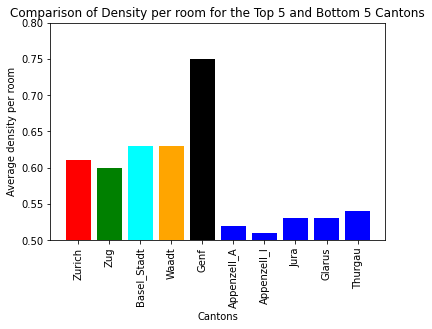

In [ ]:
#Calculation of the Top 5 with the Bottom 5 and build a combined dataframe 

#We already defined the dataframes for the Top 5 cantons earlier.

#Dataframes for the 5 least densily populated cantons
ALLAA= ALLIN[(ALLIN['Region'] == 'Appenzell_A')]
ALLAI= ALLIN[(ALLIN['Region'] == 'Appenzell_I')]
ALLJU= ALLIN[(ALLIN['Region'] == 'Jura')]
ALLGL= ALLIN[(ALLIN['Region'] == 'Glarus')]
ALLTU= ALLIN[(ALLIN['Region'] == 'Thurgau')]

#Combined Top 5 + Bottom 5 cantons
CALCTOP5 = [ALLZH, ALLZG, ALLBS, ALLVD, ALLGE]
TOP5CANTONS = pd.concat(CALCTOP5)

CALCBOTTOM5 = [ALLAA, ALLAI, ALLJU, ALLGL, ALLTU]
BOTTOM5CANTONS= pd.concat(CALCBOTTOM5)

CALC5VS5 = [TOP5CANTONS, BOTTOM5CANTONS]
CANTONS5VS5 = pd.concat(CALC5VS5)
CANTONS5VS5_2020 = CANTONS5VS5[(CANTONS5VS5['Year'] == 2020)]

#Graphical representation
plt.bar(CANTONS5VS5_2020['Region'], CANTONS5VS5_2020['Density_p_per_room'], color=['red', 'green', 'cyan', 'orange', 'black', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.ylim([0.5, 0.8])
plt.xticks(rotation = 90)
plt.xlabel ('Cantons')
plt.ylabel ('Average density per room')
plt.title('Comparison of Density per room for the Top 5 and Bottom 5 Cantons')
plt.show()

We can see that the density per room is higher for the most expensive cantons.

This could actually mean two different things: 
- either that there are not enough appartements and people start to share appartments ("Co-Location") or 
- that people tend to have less rooms because of the high prices in those areas.

Thus either the high density in Geneva is the result of the high prices to save rent or it is the result of the low availbility of appartments regardless and  the price level is only the representation of the low availibility. 

To check for the the hypothesis that the high density is actually the result of a lack of housing on the market, let us compare the ratio of empty appartements (Leerstand) per canton.

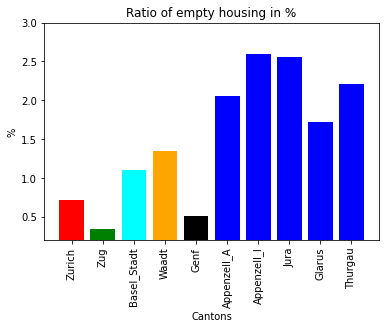

In [ ]:
plt.bar(CANTONS5VS5_2020['Region'],CANTONS5VS5_2020['Empty_quota'],color=['red','green','cyan','orange','black','blue','blue','blue','blue','blue'])
plt.ylim([0.2,3.0])
plt.xticks(rotation=90)
plt.xlabel ('Cantons')
plt.ylabel ('%')
plt.title('Ratio of empty housing in %')
plt.show()


We can see that the availibility of housing in in Zurich, Zug and Geneva is below 1% and on average 3-4 times lower than the one of our Bottom5 Cantons. 

Such a low rate might have a massiv impact on rents as people are forced to higher prices simply because they can not find adequate housing (fast enough). 


#3. Test the hypothesis

**a. Check the normality**

We will run some regressions later in this chapter to see if the price and the availibility of housing is correlated.  

Before doing so, we want to better understand how our data is actually distributed. To do so, we run some normality tests on our most important variables (Rent (total and per room), Density and Empty_Quota) 

P-value for the normality test for the different room categories in 2020 using D'Agostino-Person:

In [ ]:
PERROOM = [ALL2020['Total'], ALL2020['1Room_rent_SQM'], ALL2020['2Room_rent_SQM'], ALL2020['3Room_rent_SQM'], ALL2020['4Room_rent_SQM'], ALL2020['5Room_rent_SQM'], ALL2020['6Room_rent_SQM']]
dataset_labels = ['All rooms', '1 Room appartment', '2 room appartment', '3 room appartment', '4 room appartment', '5 room appartment', '6+ room appartment'] 
i = 0
for dataset in PERROOM:
  k2, p = stats.normaltest(dataset) # D'Agostino-Pearson
  print('%10s %1.2f ' % (dataset_labels[i],p))
  i+=1

print('Amount of N in this dataframe') 
len(ALL2020)

 All rooms 0.34 
1 Room appartment 0.00 
2 room appartment 0.65 
3 room appartment 0.66 
4 room appartment 0.21 
5 room appartment 0.21 
6+ room appartment 0.72 
Amount of N in this dataframe


27

Let us take a look at the data for 1 room appartments to find out why it is 0.
For this we use a QQ plot.

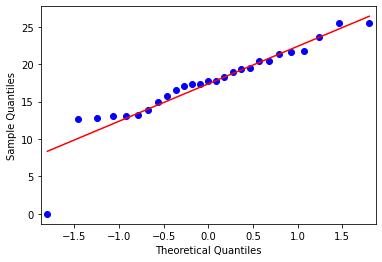

In [ ]:
fig = sm.qqplot(ALL2020['1Room_rent_SQM'], line='s')

We can see that the main reason for the low p-value in 1 Room appartments is a single outlier that is due to the fact that missing observations in the original set had an "X" and where replaced with 0 for the structure of the CSV, thus we need to check how the data would look like when filtering out this value. The filter is applied in the "adjusted datasets" (see below). Consequently, the amount of observations (N) in the adjusted dataset goes down.

In [ ]:
ALL2020check=ALL2020.sort_values(by='1Room_rent_SQM')
ALL2020adjusted = ALL2020[(ALL2020['1Room_rent_SQM'] != 0)]
ALL2019adjusted = ALL2019[(ALL2019['1Room_rent_SQM'] != 0)]
ALL2018adjusted = ALL2018[(ALL2018['1Room_rent_SQM'] != 0)]
ALL2017adjusted = ALL2017[(ALL2017['1Room_rent_SQM'] != 0)]
ALL2016adjusted = ALL2016[(ALL2016['1Room_rent_SQM'] != 0)]
ALL2015adjusted = ALL2015[(ALL2015['1Room_rent_SQM'] != 0)]
ALL2014adjusted = ALL2014[(ALL2014['1Room_rent_SQM'] != 0)]
ALL2013adjusted = ALL2013[(ALL2013['1Room_rent_SQM'] != 0)]
ALL2012adjusted = ALL2012[(ALL2012['1Room_rent_SQM'] != 0)]

PERROOM2 = [ALL2020adjusted['Total'], ALL2020adjusted['1Room_rent_SQM'], ALL2020adjusted['2Room_rent_SQM'], ALL2020adjusted['3Room_rent_SQM'], ALL2020adjusted['4Room_rent_SQM'], ALL2020adjusted['5Room_rent_SQM'], ALL2020adjusted['6Room_rent_SQM']]
dataset_labels = ['All rooms',' 1 Room appartment', '2 room appartment', '3 room appartment', '4 room appartment', '5 room appartment', '6+ room appartment'] 
i = 0
for dataset2 in PERROOM2:
  k2, p = stats.normaltest(dataset2) # DAgostino-Pearson
  print('%10s %1.2f ' % (dataset_labels[i],p))
  i+=1

 All rooms 0.37 
 1 Room appartment 0.61 
2 room appartment 0.63 
3 room appartment 0.76 
4 room appartment 0.19 
5 room appartment 0.24 
6+ room appartment 0.61 


In [ ]:
len(ALL2020adjusted)

26

The fact that the value goes down for 4 room and 6+ room appartments after adjusting the dataframes is likely due to the reduction in N (amount of appartements) Len 26 indicates that the observations in the adjusted dataset are slightly lower than in the ALL2020 dataset (len = 27).

P-value for the normality test of Total rental prices (all appartment types) for 2020 and for the whole set (2012-2020), using D'Agostino-Person

All Rents in 2020 0.37 
All Rents in 2019 0.38 
All Rents in 2018 0.40 
All Rents in 2017 0.35 
All Rents in 2016 0.29 
All Rents in 2015 0.52 
All Rents in 2014 0.39 
All Rents in 2013 0.40 
All Rents in 2012 0.59 
All rents 2012-2020 0.00 


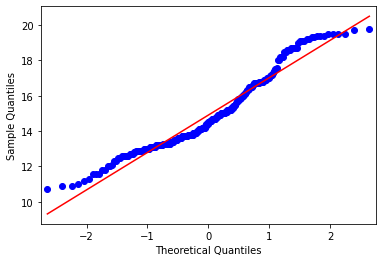

In [ ]:
UEBERALLEStotal = [ALL2020adjusted['Total'], ALL2019adjusted['Total'], ALL2018adjusted['Total'], ALL2017adjusted['Total'], ALL2016adjusted['Total'], ALL2015adjusted['Total'], ALL2014adjusted['Total'], ALL2013adjusted['Total'], ALL2012adjusted['Total'], ALLIN['Total']]
dataset_labels3 = ['All Rents in 2020', 'All Rents in 2019', 'All Rents in 2018', 'All Rents in 2017', 'All Rents in 2016', 'All Rents in 2015', 'All Rents in 2014', 'All Rents in 2013', 'All Rents in 2012', 'All rents 2012-2020'] 
i = 0
for dataset3 in UEBERALLEStotal:
  k2, p = stats.normaltest(dataset3) # D Agostino-Pearson
  print('%10s %1.2f ' % (dataset_labels3[i], p))
  i+=1

fig = sm.qqplot(ALLIN['Total'], line='s')
#To be discussed during the presentation why the QQ plot looks relatively good but the p-value is 0.00 ? 

P-value for the normality test of the empty appartement quota for 2020 and for the whole set (2012-2020), using D'Agostino-Person.

Empty appartements quota in 2020 0.76 
Empty appartements quota in 2019 0.69 
Empty appartements quota in 2018 0.99 
Empty appartements quota in 2017 0.50 
Empty appartements quota in 2016 0.47 
Empty appartements quota in 2015 0.74 
Empty appartements quota in 2014 0.35 
Empty appartements quota in 2013 0.63 
Empty appartements quota in 2012 0.42 
Empty appartements quota for 2012-2020 0.03 


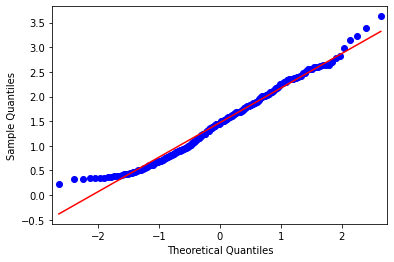

In [ ]:
UEBERALLESempty = [ALL2020adjusted['Empty_quota'], ALL2019adjusted['Empty_quota'], ALL2018adjusted['Empty_quota'], ALL2017adjusted['Empty_quota'], ALL2016adjusted['Empty_quota'], ALL2015adjusted['Empty_quota'], ALL2014adjusted['Empty_quota'], ALL2013adjusted['Empty_quota'], ALL2012adjusted['Empty_quota'], ALLIN['Empty_quota']]
dataset_labels4 = ['Empty appartements quota in 2020', 'Empty appartements quota in 2019', 'Empty appartements quota in 2018', 'Empty appartements quota in 2017', 'Empty appartements quota in 2016', 'Empty appartements quota in 2015', 'Empty appartements quota in 2014', 'Empty appartements quota in 2013', 'Empty appartements quota in 2012', 'Empty appartements quota for 2012-2020'] 
i = 0
for dataset4 in UEBERALLESempty:
  k2, p = stats.normaltest(dataset4) # D'Agostino-Pearson
  print('%10s %1.2f ' % (dataset_labels4[i], p))
  i+=1
fig = sm.qqplot(ALLIN['Empty_quota'], line='s')

P-value for the normality test of the Density for 2020 and for the whole set (2012-2020), using D Agostino-Person.

In [ ]:
UEBERALLESdensity = [ALL2020adjusted['Density_p_per_room'], ALL2019adjusted['Density_p_per_room'], ALL2018adjusted['Density_p_per_room'], ALL2017adjusted['Density_p_per_room'], ALL2016adjusted['Density_p_per_room'], ALL2015adjusted['Density_p_per_room'], ALL2014adjusted['Density_p_per_room'], ALL2013adjusted['Density_p_per_room'], ALL2012adjusted['Density_p_per_room']]
dataset_labels = ['Density in 2020', 'Density in 2019', 'Density in 2018', 'Density in 2017', 'Density in 2016', 'Density in 2015', 'Density in 2014', 'Density in 2013', 'Density in 2012', 'Density for 2012-2020'] 
i = 0
for dataset in UEBERALLESdensity:
  k2, p = stats.normaltest(dataset) # D Agostino-Pearson
  print('%10s %1.2f ' % (dataset_labels[i], p))
  i+=1

Density in 2020 0.00 
Density in 2019 0.00 
Density in 2018 0.00 
Density in 2017 0.00 
Density in 2016 0.00 
Density in 2015 0.00 
Density in 2014 0.00 
Density in 2013 0.00 
Density in 2012 0.00 


Taking a look on the above p-values shows that the assumption of normality for the DENSITY does not hold at all.

Looking at the below QQ plots shows a potential explanation. 

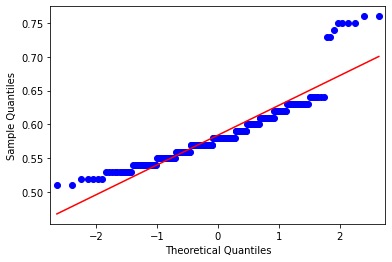

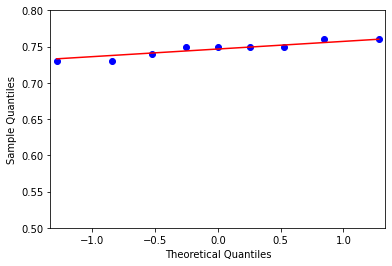

In [ ]:
ALL2020noGE = ALL2020[(ALL2020['Region'] != 'Genf')]
fig = sm.qqplot(ALLIN['Density_p_per_room'], line='s')
fig = sm.qqplot(ALLGE['Density_p_per_room'], line='s',)
plt.ylim([0.5,0.8])
print()

In [ ]:
#For testing purpose we recalculated the p-value without Geneva in the sample 
k2, NoGenf = stats.normaltest(ALL2020noGE['Density_p_per_room'])
print('The p-value of the density in 2020 excluding Geneva is', NoGenf)

The p-value of the density in 2020 excluding Geneva is 0.8322478240324583


The outlier here is Geneva which is not a formal mistake in the dataset but a unique feature of the extremely high density in the City itself.

The normality test looks okay for TOTAL as well as LEERSTAND after the data adjustment (elimination of cases with TOTAL = 0) but normality needs to be rejected for the Density due to the effect of the region of Geneva.

After confirming Normality for the variables TOTAL and EMPTY_QUOTA, we could perform an ANOVA test to check for our hypothesis. 

**Open Question:**

For us it is unclear if we need to take time (different years) into consideration in the ANOVA test meaning are our different samples the cantons or the years ? 

We further do not understand how the ANOVA help us as the normality is not relevant for the regression thus not relevant to show a correlation, right ? 

In [ ]:
#from scipy.stats import f_oneway
#f_oneway(ALL2020adjusted['Total'], ALL2019adjusted['Total'], ALL2018adjusted['Total'], ALL2017adjusted['Total'], ALL2016adjusted['Total'], ALL2015adjusted['Total'], ALL2014adjusted['Total'], ALL2013adjusted['Total'], ALL2012adjusted['Total'])
#f_oneway(ALLZH['Total'],ALLZG['Total'],ALLGE['Total'],ALLBS['Total'],ALLVD['Total'],ALLAA['Total'], ALLAI['Total'], ALLGL['Total'], ALLJU['Total'], ALLTU['Total'])
#f_oneway(ALLZH['Empty_quota'],ALLZG['Empty_quota'],ALLGE['Empty_quota'],ALLBS['Empty_quota'],ALLVD['Empty_quota'],ALLAA['Empty_quota'], ALLAI['Empty_quota'], ALLGL['Empty_quota'], ALLJU['Empty_quota'], ALLTU['Empty_quota'])
#f_oneway(ALL2020['Density_p_per_room'], ALL2019['Density_p_per_room'], ALL2018['Density_p_per_room'], ALL2017['Density_p_per_room'], ALL2016['Density_p_per_room'], ALL2015['Density_p_per_room'], ALL2014['Density_p_per_room'], ALL2013['Density_p_per_room'], ALL2012['Density_p_per_room'])

**b. Check the relation between rental prices and empty appartements**

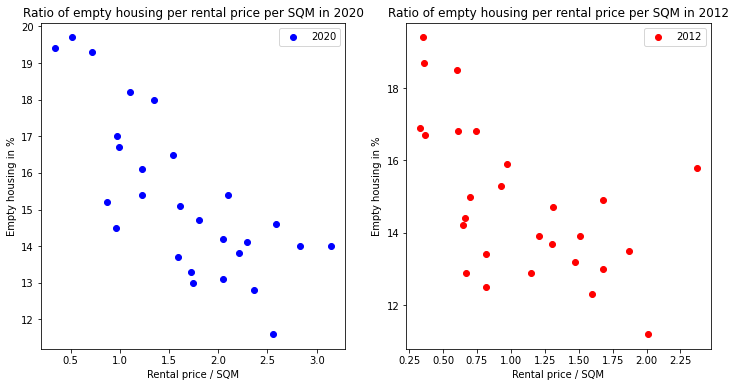

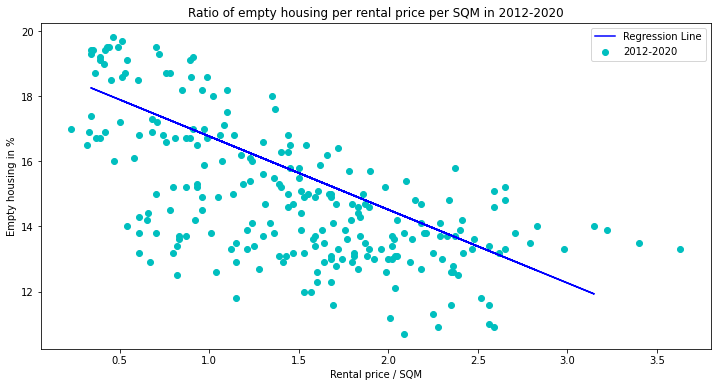

In [ ]:
#Check the relation between the the rental prices and the empty quota
ALL2020b=ALL2020
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
LEERSTAND=ALL2020['Empty_quota']
RENT=ALL2020['Total']
slope, intercept, r_value, p_value, std_err = stats.linregress(LEERSTAND, RENT)

#GRAFIKEN
plt.figure((1), figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(ALL2020['Empty_quota'],ALL2020['Total'],c='b',label='2020')
plt.xlabel ('Rental price / SQM')
plt.ylabel ('Empty housing in %')
plt.title('Ratio of empty housing per rental price per SQM in 2020')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(ALL2012['Empty_quota'],ALL2012['Total'],c='r',label='2012')
plt.xlabel ('Rental price / SQM')
plt.ylabel ('Empty housing in %')
plt.title('Ratio of empty housing per rental price per SQM in 2012')
plt.legend()

plt.figure((2), figsize=(12,6))
plt.scatter(ALLIN['Empty_quota'],ALLIN['Total'],c='c',label='2012-2020')
plt.plot(LEERSTAND, intercept + slope*LEERSTAND, 'b', label='Regression Line')
plt.xlabel ('Rental price / SQM')
plt.ylabel ('Empty housing in %')
plt.title('Ratio of empty housing per rental price per SQM in 2012-2020')
plt.legend()

plt.show()

In line with our initial assumption, we can see that there seems to be a negative correlation between the price per square meter for a appartement and the availibility of appartements on the market.

In [ ]:
print('%1.2f %1.2f' % (slope, intercept))
print('%1.2f +- %1.2f' % (slope,std_err))
print('R squared =', r_value**2)
print()

-2.25 19.02
-2.25 +- 0.39
R squared = 0.5746443100844363



We can see that there is a strong negative correlation between LEERSTAND and TOTAL, meaning that the initial capitalist hypothesis of supply and demand (the price of rental space increases when the amount of empty appartements decreases) is most likely correct.

With an R2 of 0.57, we can explain a substantial amount of the "Leerstand" effect on rents.

(Disclaimer: theoretically it could also be the other way around considering that we did not check for causation) 

We can do the same with the density (level: room) and would expect a strong positive correlation.

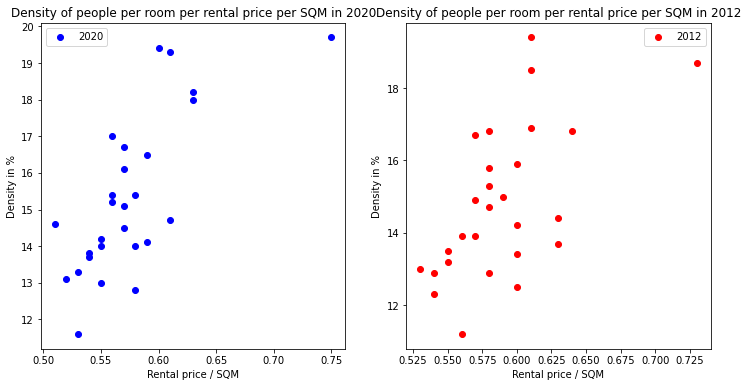

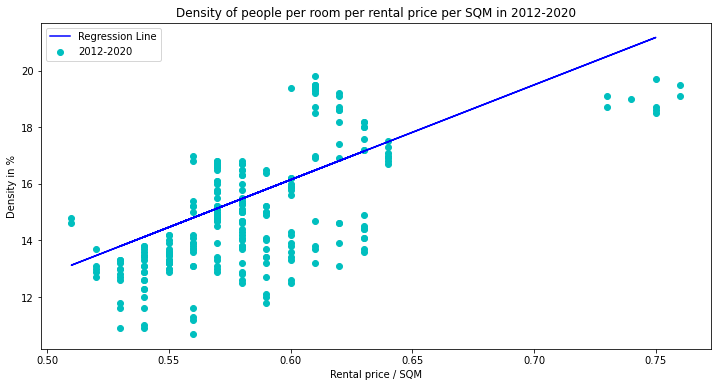

In [ ]:
ALL2020b=ALL2020
DENSITY=ALL2020['Density_p_per_room']
RENT=ALL2020['Total']
slope, intercept, r_value, p_value, std_err = stats.linregress(DENSITY,RENT)

#GRAFIKEN
plt.figure((1), figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(ALL2020['Density_p_per_room'], ALL2020['Total'], c='b', label='2020')
plt.xlabel ('Rental price / SQM')
plt.ylabel ('Density in %')
plt.title('Density of people per room per rental price per SQM in 2020')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(ALL2012['Density_p_per_room'], ALL2012['Total'], c='r', label='2012')
plt.xlabel ('Rental price / SQM')
plt.ylabel ('Density in %')
plt.title('Density of people per room per rental price per SQM in 2012')
plt.legend()

plt.figure((2), figsize=(12, 6))
plt.scatter(ALLIN['Density_p_per_room'], ALLIN['Total'], c='c', label='2012-2020')
plt.plot(DENSITY, intercept + slope*DENSITY, 'b', label='Regression Line')
plt.xlabel ('Rental price / SQM')
plt.ylabel ('Density in %')
plt.title('Density of people per room per rental price per SQM in 2012-2020')
plt.legend()

plt.show()

In [ ]:
print('%1.2f %1.2f' % (slope, intercept))
print('%1.2f +- %1.2f' % (slope,std_err))
print('R squared =', r_value**2)
print()

33.50 -3.96
33.50 +- 6.38
R squared = 0.5244087285280505



We can see that there is a strong positive correlation between DENSITY and TOTAL, meaning that the higher prices are, the more people will start sharing rooms/reduce the amount of rooms a single person will occupy. 

With an R2 of 0.52 , we can explain a substantial amount of the price effect on rents.

More like we are actually explaining an effect on the amount of space occupied per person by rental price, but as we only showed a correlation, we can not be sure about the casual relationship between both variables at this point.

In [ ]:
#MULTIVARIANTE ANALYSIS 
# independend variables (LEERSTAND and DENSITY)
X = ALLIN.iloc[:, 9:11]
# dependent variable (Total)
Y = ALLIN.iloc[:, 2]

#X.head(9)

lm = linear_model.LinearRegression()
lm.fit(X, Y)
print()
print('R2 of the combined model using LEERSTAND and DENSITY')
lm.score(X,Y)


#Do the variables correlate (Variance in something.... function)





R2 of the combined model using LEERSTAND and DENSITY


0.5317384577778141

In [ ]:
#Checking for spurious relations between our two independent variables 
slope, intercept, r_value, p_value, std_err = stats.linregress(DENSITY,LEERSTAND)
print('R squared von DENSITY explained by LEERSTAND =', r_value**2)
print()

R squared von DENSITY explained by LEERSTAND = 0.27270119019753286



We can see that the combined model has a lower R2 than LEERSTAND but a higher R2 than DENSITY indicating correlation between those two independent variables (see R2) and raising the question of ("suprious relation") and causation that are very interesting but beyond the scope of this analysis.

#Conclusion


Our very simplified model shows that the price for rent in Switzerland is driven by the availibility of housing on the market and we further believe that people react to this trend of decreasing availibility by increased sharing and reducing of space of living (represented by the DENSITY function).

We believe that there are many more suitable explanatory variables to build an adequate model to explain the rental price peaks in specific regions but additional time and effort would be required to enhance the model and take a deeper look into those variables. 

Excellent candidates would be:
  - the total amount of housing per canton as an indicator for supply
  -  the amount of social housing per canton represented by the "Genossenschaft" appartements as a mitigating factor of price increases
  - the ownership quota in the different regions as an indicator of historic prices
  - square meter size per appartment to control for the effect of reducing your living space when beeing presented with higher prices 
  - Income levels in specific areas (This has been ignored so far as the income data is available on another aggregation level meaning we would need to combine different cantons into bigger regions to be able to make use of such an input variable)
  - the amount and the age of people per household per canton, as this can have an impact on the density
  - Cantonal level tax competition that can be seen as a katalysator for population growth (and also defines the sub groups of population) 
  - the concentration of property in the hand of a few allowing them to set rent prices uncorrelated from the demand
  - the speculation of owners waiting for the rent prices to rise before renting their empty appartments

A deeper analysis would also require to identify the spurious (co)relations between explanatory variables when extending the model. 

It would further be very interesting to better understand the direction of the relationship (Causation) as we can argue that DENSITY can be seen as a consequence of the high prices as people tend to reduce the amount of square meters they occupy individually. At the same time, it could also be used as a proxy variable for lower income (as people tend to share space) and lower income regions are more likely to be faced with lower prices (following our supply and demand logic).   

Potentially the most interesting extension of the model would be to use population growth in the future to explain current price levels. 
- As perfect markets internalize future trends into current prices, we might be able to make an estimation of future "LEERSTAND" and see if this has an effect on the current price level. This can be modelised by using the data on growth of inhabitants per region between 2020 to 2050. 

An open question that would need further analysis is: why do we see such a drop in the price level in 2013/2014? 